# Logistic Regression(with feature engineering)

Any player who has never competed in an NBA game prior to that year is considered a rookie in the league. The NBA presents the NBA Rookie of the Year Award to the top rookie at the conclusion of the regular season.A basketball player's transition to the NBA is a significant event. The beginning of their careers is something that sports analysts and fans eagerly anticipate to monitor and predict how they will perform in the future.This notebook will use Logistic Regression to predict whether or not a player will last five years in the league based on his stats.

The steps are:
1. Load Data
2. Data Cleaning and Exploration
3. Train LR Classifier
4. Evaluation
5. Feature importance
6. Prediction

In [106]:
import pandas as pd
import numpy as np
import shap
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Qt5Agg') 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
cd /Users/frodo/Downloads/36114/project/adv_dsi_2023/adv_dsi_ass_1

/Users/frodo/Downloads/36114/project/adv_dsi_2023/adv_dsi_ass_1


## 1. Load data

In [4]:
import os
os.getcwd()

'/Users/frodo/Downloads/36114/project/adv_dsi_2023/adv_dsi_ass_1'

In [49]:
from src.data.dataloader import DataLoader

loader = DataLoader('data/raw/nba_train.csv', test_size=0.2, random_state=42)

In [50]:
# Load the data and get the DataFrame and target variable
df, y = loader.load_data()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = loader.data_split()

### Display the first 5 rows of train data

In [51]:
X_train.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
Id,,,,,,,,,,,,,,,,,,,
4398,66,34.1,13.4,5.3,11.6,46.6,0.9,2.6,24.8,1.7,2.2,77.7,0.5,2.5,2.8,3.7,1.6,0.1,2.4
11560,57,18.5,10.2,3.8,7.8,48.2,0.1,0.5,38.6,2.5,3.3,75.5,1.6,1.4,2.7,3.2,1.9,0.2,1.2
5621,37,13.5,2.7,1.0,2.8,35.3,0.8,2.6,43.4,0.3,0.4,68.5,0.1,0.8,1.1,1.5,0.7,-0.1,0.5
11269,57,19.7,6.0,2.3,5.6,41.6,0.1,0.4,13.4,1.2,1.4,81.3,0.9,2.6,3.2,2.2,0.5,0.4,1.4
9323,78,11.4,5.5,2.1,5.4,38.3,0.3,1.1,19.7,0.7,1.0,77.1,0.1,0.5,0.6,3.3,0.9,-15.7,1.3


### Display the shape of train data

In [52]:
X_train.shape

(6400, 19)

There are 8000 observations with 20 features,and there is no missing value in train dataset

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6400 entries, 4398 to 5398
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GP       6400 non-null   int64  
 1   MIN      6400 non-null   float64
 2   PTS      6400 non-null   float64
 3   FGM      6400 non-null   float64
 4   FGA      6400 non-null   float64
 5   FG%      6400 non-null   float64
 6   3P Made  6400 non-null   float64
 7   3PA      6400 non-null   float64
 8   3P%      6400 non-null   float64
 9   FTM      6400 non-null   float64
 10  FTA      6400 non-null   float64
 11  FT%      6400 non-null   float64
 12  OREB     6400 non-null   float64
 13  DREB     6400 non-null   float64
 14  REB      6400 non-null   float64
 15  AST      6400 non-null   float64
 16  STL      6400 non-null   float64
 17  BLK      6400 non-null   float64
 18  TOV      6400 non-null   float64
dtypes: float64(18), int64(1)
memory usage: 1000.0 KB


In [54]:
X_train.isna().any()

GP         False
MIN        False
PTS        False
FGM        False
FGA        False
FG%        False
3P Made    False
3PA        False
3P%        False
FTM        False
FTA        False
FT%        False
OREB       False
DREB       False
REB        False
AST        False
STL        False
BLK        False
TOV        False
dtype: bool

In [55]:
X_train.isnull().any()

GP         False
MIN        False
PTS        False
FGM        False
FGA        False
FG%        False
3P Made    False
3PA        False
3P%        False
FTM        False
FTA        False
FT%        False
OREB       False
DREB       False
REB        False
AST        False
STL        False
BLK        False
TOV        False
dtype: bool

## 2.Data Cleaning and Exploration

We will do data cleaning and data exploration simultaneously because data exploration often goes hand in hand with data cleaning processes in our experiment

### Description of data

In [56]:
X_train.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.00000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,62.893281,18.567750,7.246797,2.798437,6.213375,44.601250,0.264516,0.815094,19.544703,1.38850,1.943422,71.305531,1.077063,2.171969,3.247453,1.621313,0.650047,0.241875,1.256375
std,17.126229,8.898833,4.285541,1.679960,3.556203,6.125671,0.384752,1.062505,16.058255,0.91972,1.239594,10.423423,0.779683,1.379342,2.067040,1.362032,0.409841,0.807298,0.720395
min,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,-38.500000,0.00000,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000
25%,52.000000,12.000000,4.100000,1.500000,3.600000,40.400000,0.000000,0.100000,8.300000,0.70000,1.000000,65.100000,0.500000,1.100000,1.700000,0.600000,0.300000,0.100000,0.700000
50%,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,19.500000,1.20000,1.700000,71.300000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000
75%,74.000000,23.525000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,30.425000,1.90000,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000
max,123.000000,73.800000,34.200000,13.100000,28.900000,65.300000,1.600000,4.400000,82.100000,7.60000,9.600000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,15.100000,5.200000


We can see there are some negative values in our dataset, but negative values are usually not present in this case, we may handle this problem in the data preprocess step

### Distribution of Y

In [57]:
y_train.value_counts()

1    5335
0    1065
Name: TARGET_5Yrs, dtype: int64

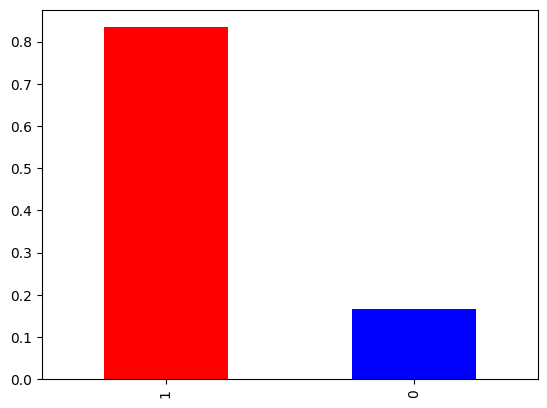

In [58]:
# Calculate positive and negative sample ratios
sizes = y_train.value_counts(normalize=True).plot(kind="bar", color=["red", "blue"])

### Correlation matrix

In [59]:
#Correlation matrix
corr_matrix = df.corr()

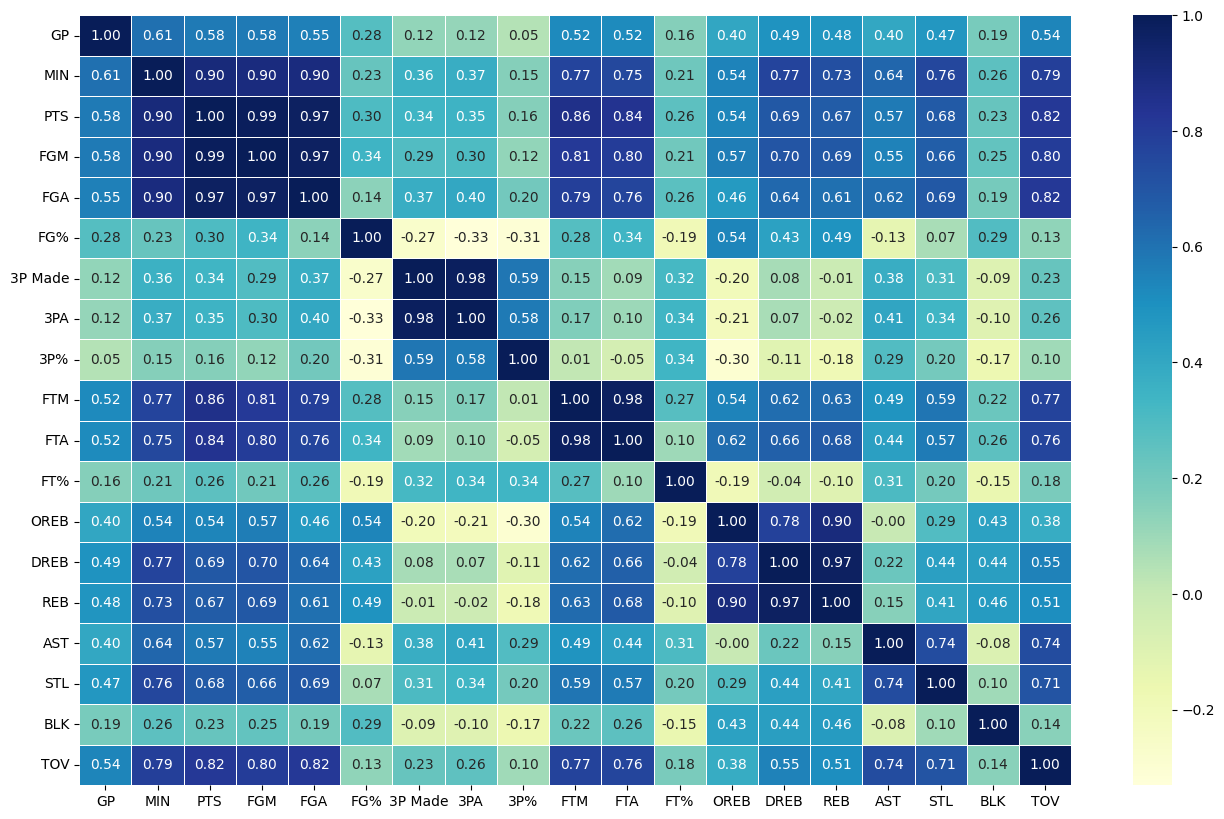

In [60]:
#plot heatmap
fig, ax = plt.subplots(figsize=(16,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

In [61]:
df_train=X_train.copy()

### Feature Engineering

In [62]:
%load_ext autoreload
%autoreload 2

In [63]:
from src.features.add_features import FeatureGenerator

# Create an instance of the generator, passing in the DataFrame to process
generator = FeatureGenerator(X_train)

# Generate the features and get the processed DataFrame
X_train = generator.generate()

In [64]:
from src.features.customer_preprocessor import CustomPreprocessor

## 3. Train model

we generate a custompreprocessor ensure there is no negative value in our train dataset

In [78]:
from src.trainers.LR import Trainer

In [83]:
trainer = Trainer()
model = trainer.train(X_train, y_train, model_filename='LR_FE.joblib')

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

## 4. Evaluation on test data

we applied the trained model on validation data to obtain model performance 

In [114]:
from src.evaluation.evaluation import Evaluator

In [115]:
# Create an instance of the generator, passing in the DataFrame to process
generator = FeatureGenerator(X_test)

# Generate the features and get the processed DataFrame
X_test = generator.generate()

In [116]:
evaluator = Evaluator()
accuracy, roc_auc = evaluator.evaluate(model, X_test, y_test)

print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")

Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.66      0.39       266
           1       0.91      0.65      0.76      1334

    accuracy                           0.65      1600
   macro avg       0.59      0.65      0.57      1600
weighted avg       0.80      0.65      0.69      1600

Confusion Matrix:
 [[176  90]
 [470 864]]
ROC AUC Score: 0.702297347566818
Accuracy: 0.65
ROC AUC: 0.702297347566818


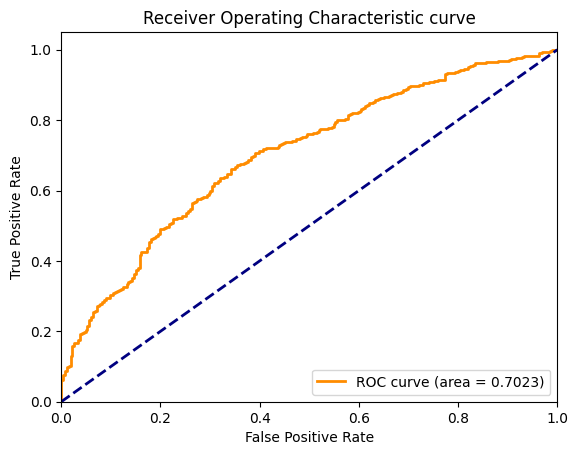

In [120]:
evaluator.plot_roc_curve(model, X_test, y_test)

## 5.Feature importance

In [123]:
feature_importance = model.best_estimator_.named_steps['classifier'].coef_
feature_names = X_train.columns.tolist()
result = dict(zip(feature_names, feature_importance[0]))

### Plot the feature importances

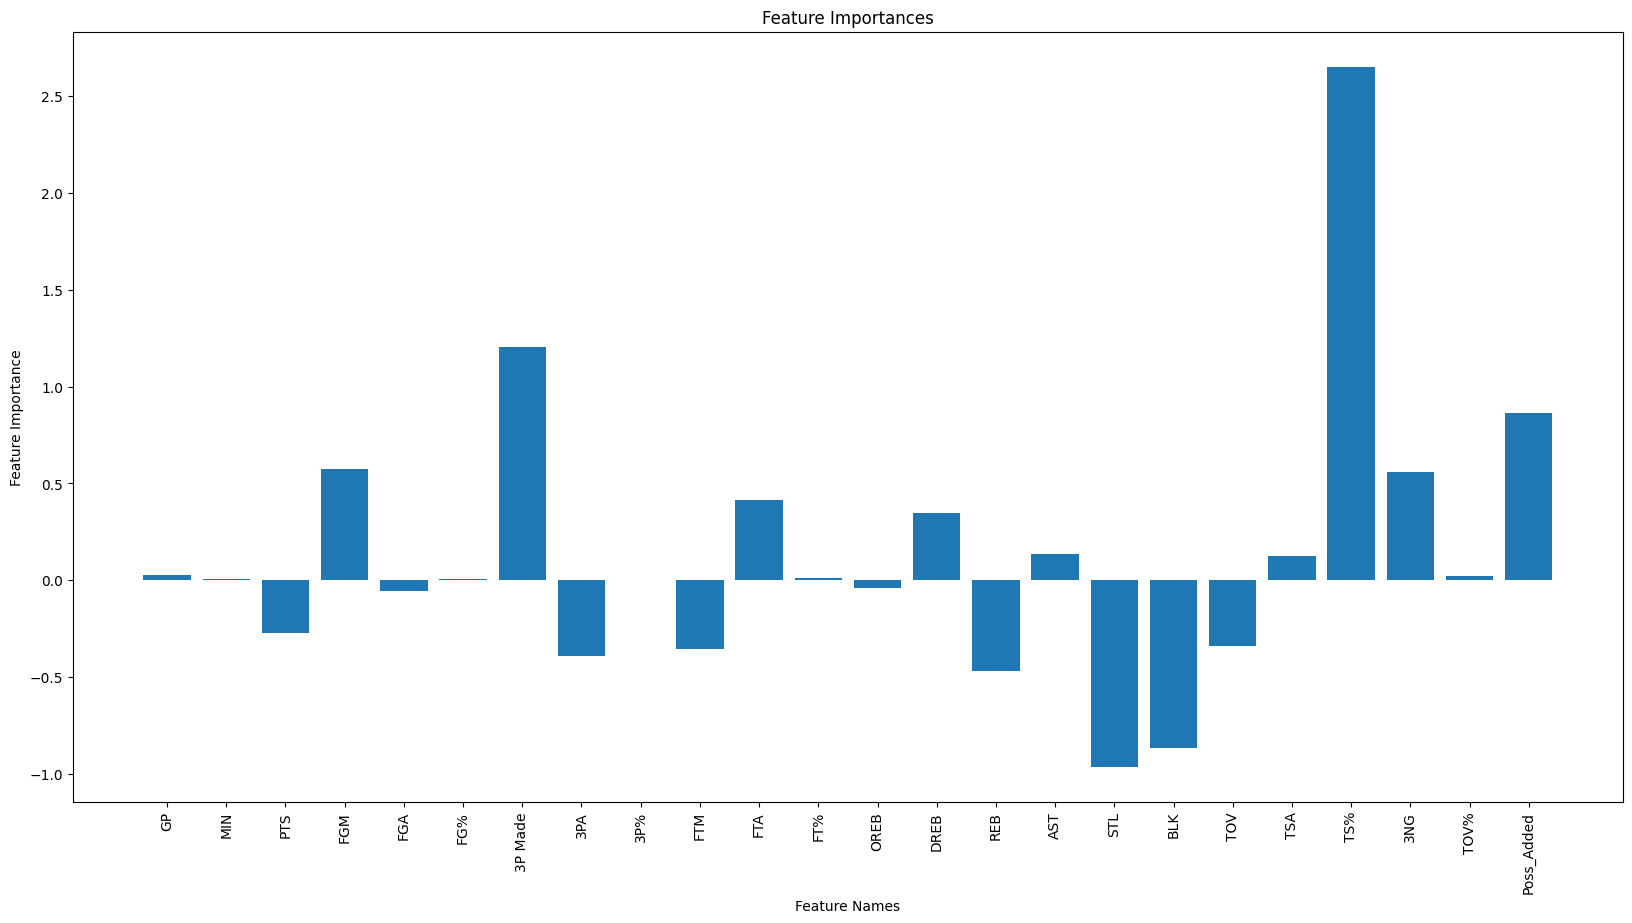

In [126]:
plt.figure(figsize=(20, 10))
plt.bar(np.arange(len(feature_importance[0])), feature_importance[0], align='center')
plt.xticks(np.arange(len(feature_importance[0])), feature_names, rotation=90)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance')
plt.title('Feature Importances')
plt.show()

## 6.Prediction

Finally we applied the trained model on test data and upload our result to obtain score

### Load test data

In [128]:
#Load the dataset
df_test = pd.read_csv("data/raw/nba_test.csv")
df_test = df_test.set_index(['Id'])

### Transform the features

In [129]:
# Create an instance of the generator, passing in the DataFrame to process
generator = FeatureGenerator(df_test)

# Generate the features and get the processed DataFrame
df_test = generator.generate()

### Load the model

In [132]:
# Load the model from the file 
model = joblib.load('models/LR_FE.joblib') 

### Obtain predict value

In [134]:
# prediction
y_label = model.predict(df_test)
y_score = model.predict_proba(df_test)[:, 1]

## 7.Push changes

**[7.1]** Add the changes to git staging area

In [135]:
git add .

SyntaxError: invalid syntax (3827820173.py, line 1)

**[7.2]** Create the snapshot of the repository and add a description

In [ ]:
git commit -m "Logistic Regression with feature engineering"